# Species Segmentation with Cluster Analysis

The Iris flower dataset is one of the most popular ones for machine learning. You can read a lot about it online and have probably already heard of it: https://en.wikipedia.org/wiki/Iris_flower_data_set

We didn't want to use it in the lectures, but believe that it would be very interesting for you to try it out (and maybe read about it on your own).

There are 4 features: sepal length, sepal width, petal length, and petal width.

***

You have already solved the first exercise, so you can start from there (you've done taken advantage of the Elbow Method).

Plot the data with 2, 3 and 5 clusters. What do you think that means?

Finally, import the CSV with the correct answers (iris_with_answers.csv) and check if the clustering worked as expected. Note that this is not how we usually go about clustering problems. If we have the answers prior to that, we would go for classification (e.g. a logistic regression).

## Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

sns.set_theme()

## Load the data

Load data from the csv file: <i> 'iris_dataset.csv'</i>.

In [2]:
raw_data = pd.read_csv('iris_dataset.csv')
raw_data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Plot the data

For this exercise, try to cluster the iris flowers by the shape of their sepal. 

<i> Use the 'sepal_length' and 'sepal_width' variables.</i> 

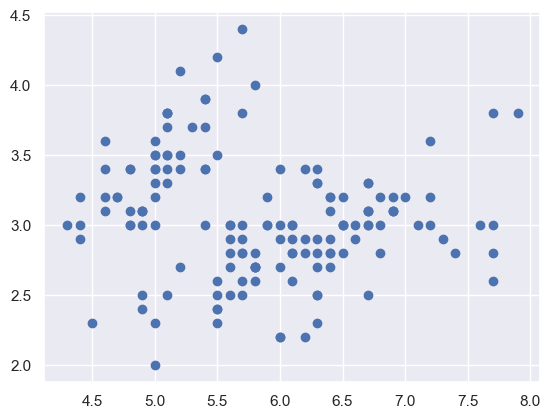

In [3]:
plt.scatter(raw_data['sepal_length'], raw_data['sepal_width'])
plt.show()

## Clustering (unscaled data)

In [4]:
data = raw_data.iloc[:, :2]
data.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [5]:
k = 2
kmeans = KMeans(k)
kmeans.fit(data)

data_w_clusters = data.copy()
data_w_clusters['Cluster'] = kmeans.fit_predict(data)
data_w_clusters.head()

c:\Users\diogo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


c:\Users\diogo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,sepal_length,sepal_width,Cluster
0,5.1,3.5,1
1,4.9,3.0,1
2,4.7,3.2,1
3,4.6,3.1,1
4,5.0,3.6,1


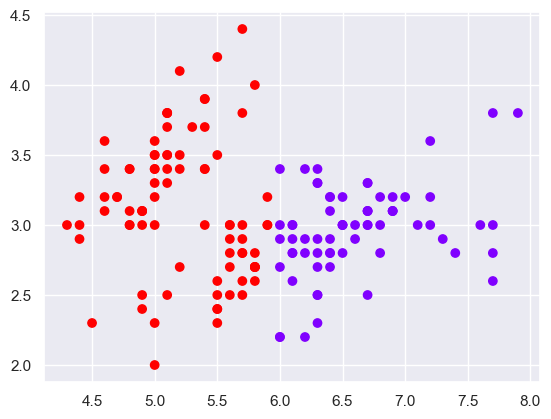

In [6]:
plt.scatter(data_w_clusters['sepal_length'], data_w_clusters['sepal_width'], c=data_w_clusters['Cluster'], cmap='rainbow')
plt.show()

## Standardize the variables

Import and use the <i> scale </i> method from sklearn to standardize the data. 

In [7]:
from sklearn import preprocessing

x = data_w_clusters[['sepal_length', 'sepal_width']]

x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.90068117,  1.03205722],
       [-1.14301691, -0.1249576 ],
       [-1.38535265,  0.33784833],
       [-1.50652052,  0.10644536],
       [-1.02184904,  1.26346019],
       [-0.53717756,  1.95766909],
       [-1.50652052,  0.80065426],
       [-1.02184904,  0.80065426],
       [-1.74885626, -0.35636057],
       [-1.14301691,  0.10644536],
       [-0.53717756,  1.49486315],
       [-1.26418478,  0.80065426],
       [-1.26418478, -0.1249576 ],
       [-1.87002413, -0.1249576 ],
       [-0.05250608,  2.18907205],
       [-0.17367395,  3.11468391],
       [-0.53717756,  1.95766909],
       [-0.90068117,  1.03205722],
       [-0.17367395,  1.72626612],
       [-0.90068117,  1.72626612],
       [-0.53717756,  0.80065426],
       [-0.90068117,  1.49486315],
       [-1.50652052,  1.26346019],
       [-0.90068117,  0.56925129],
       [-1.26418478,  0.80065426],
       [-1.02184904, -0.1249576 ],
       [-1.02184904,  0.80065426],
       [-0.7795133 ,  1.03205722],
       [-0.7795133 ,

## Clustering (scaled data)

In [8]:
k = 2
kmeans_scaled = KMeans(k)

data_w_clusters['Cluster'] = kmeans_scaled.fit_predict(x_scaled)
data_w_clusters.head()

c:\Users\diogo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,sepal_length,sepal_width,Cluster
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


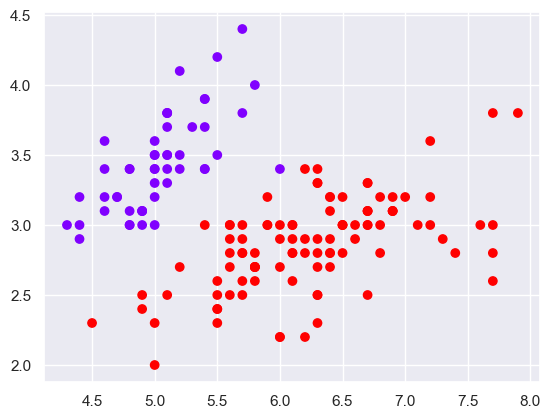

In [9]:
plt.scatter(data_w_clusters['sepal_length'], data_w_clusters['sepal_width'], c=data_w_clusters['Cluster'], cmap='rainbow')
plt.show()

Looks like the two solutions are identical. That is because the original features have very similar scales to start with!

## Take Advantage of the Elbow Method

### WCSS

In [10]:
import warnings
warnings.filterwarnings("ignore")

results = []
for k in range(1, 15):
    kmeans_test = KMeans(k)
    kmeans_test.fit(x)
    results.append(kmeans_test.inertia_)
results = np.array(results)
results

array([130.18093333,  57.98240604,  37.12370213,  27.93792666,
        20.94968665,  17.50177403,  14.63152389,  12.7037858 ,
        11.25772282,   9.76750108,   8.76220435,   7.90022744,
         7.18661497,   6.58105065])

### The Elbow Method

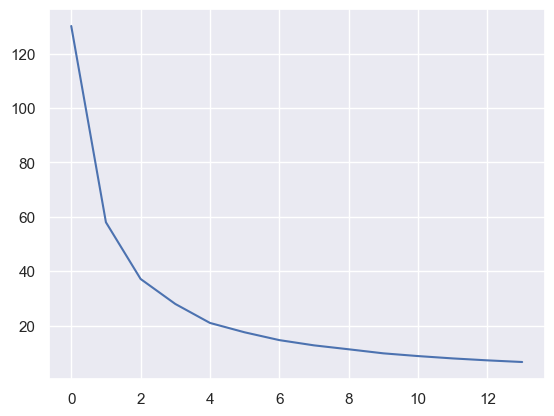

In [11]:
plt.plot(results)
plt.show()

## Understanding the Elbow Curve

Construct and compare the scatter plots to determine which number of clusters is appropriate for further use in our analysis. Based on the Elbow Curve, 2, 3 or 5 seem the most likely.

## 2 clusters

Start by separating the standardized data into 2 clusters (you've already done that!)

In [12]:
data_w_clusters.head()

,sepal_length,sepal_width,Cluster
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


Construct a scatter plot of the original data using the standardized clusters

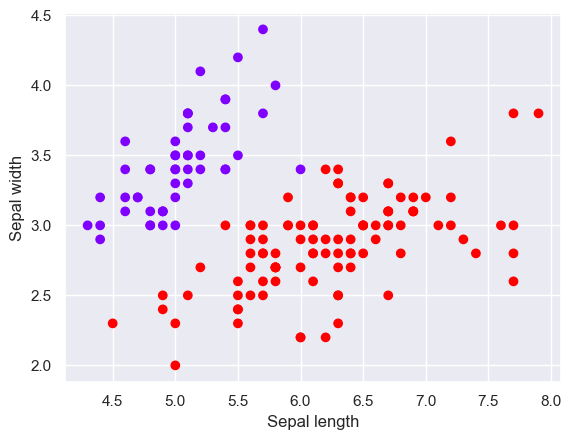

In [13]:
plt.scatter(data_w_clusters['sepal_length'], data_w_clusters['sepal_width'], c=data_w_clusters['Cluster'], cmap='rainbow')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

## 3 clusters
Redo the same for 3 and 5 clusters

In [14]:
kmeans_scaled_3 = KMeans(3)

data_w_clusters['Cluster_3'] = kmeans_scaled_3.fit_predict(x_scaled)
data_w_clusters.head()

,sepal_length,sepal_width,Cluster,Cluster_3
0,5.1,3.5,0,0
1,4.9,3.0,0,0
2,4.7,3.2,0,0
3,4.6,3.1,0,0
4,5.0,3.6,0,0


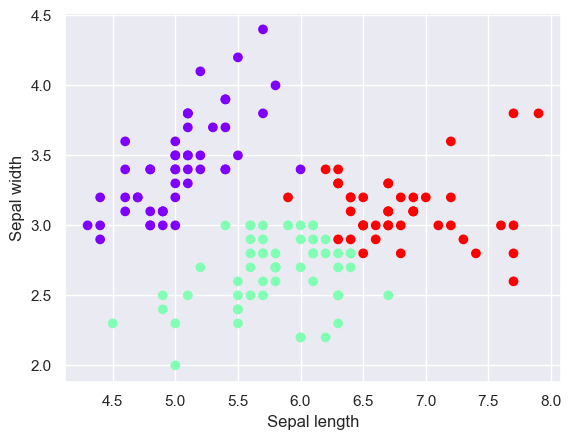

In [15]:
plt.scatter(data_w_clusters['sepal_length'], data_w_clusters['sepal_width'], c=data_w_clusters['Cluster_3'], cmap='rainbow')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

## 5 clusters

In [16]:
kmeans_scaled_5 = KMeans(5)

data_w_clusters['Cluster_5'] = kmeans_scaled_5.fit_predict(x_scaled)
data_w_clusters.head()

,sepal_length,sepal_width,Cluster,Cluster_3,Cluster_5
0,5.1,3.5,0,0,1
1,4.9,3.0,0,0,1
2,4.7,3.2,0,0,1
3,4.6,3.1,0,0,1
4,5.0,3.6,0,0,1


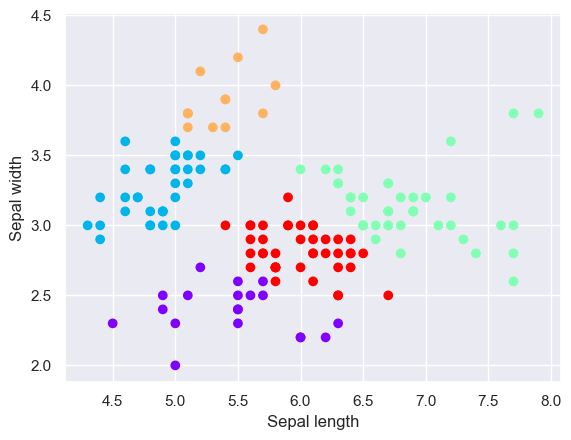

In [17]:
plt.scatter(data_w_clusters['sepal_length'], data_w_clusters['sepal_width'], c=data_w_clusters['Cluster_5'], cmap='rainbow')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

## Compare your solutions to the original iris dataset

The original (full) iris data is located in <i>iris_with_answers.csv</i>. Load the csv, plot the data and compare it with your solution. 

Obviously there are only 3 types, because that's the original (truthful) iris dataset.

The 2-cluster solution seemed good, but in real life the iris dataset has 3 SPECIES (a 3-cluster solution). Therefore, clustering cannot be trusted at all times. Sometimes it seems like x clusters are a good solution, but in real life, there are more (or less).

In [18]:
original_data = pd.read_csv('iris_with_answers.csv')
original_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [19]:
def get_species_id(species):
    return np.nonzero(original_data['species'].unique() == species)[0][0]

original_data['species'] = original_data['species'].map(get_species_id)
original_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


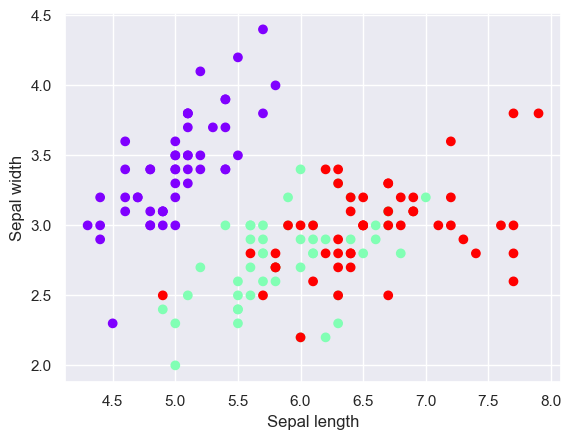

In [20]:
plt.scatter(original_data['sepal_length'], original_data['sepal_width'], c=original_data['species'], cmap='rainbow')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

## Comparison Original x Clustered

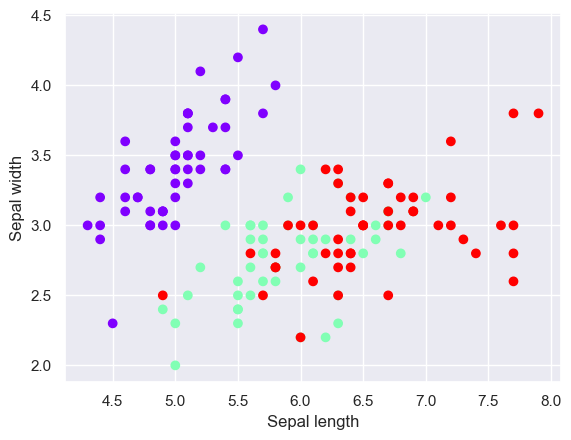
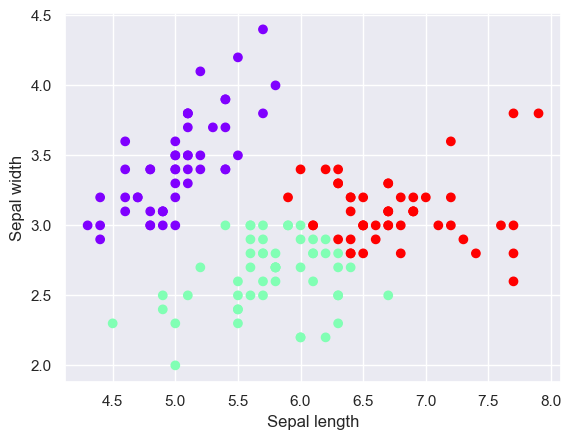  
With this comparison we verify that we have successfully identified 1 of the clusters, although for the other 2 clustering would not be the viable method of classification with the variables we have since we were only using 2 of them.